## Importing Libraries

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_percentage_error

## Loading and Exploring the Data

In [182]:
df = pd.read_csv('data/Consumo_cerveza_SP.csv')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [184]:
df.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [185]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


## Data Cleaning and Preparation

In [186]:
df.dropna(inplace=True)

In [187]:
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',','.').astype(float)
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',','.').astype(float)
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',','.').astype(float)
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',','.').astype(float)

In [188]:
df.columns = ['Fecha', 'Temperatura_Media', 'Temperatura Minima', 'Temperatura Maxima', 'Precipitacao', 'Fin de Semana','lt de cerveza']
df.columns = df.columns.str.lower().str.replace(' ','_')

In [189]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [190]:
df.drop(columns='fecha').corr()['lt_de_cerveza']

temperatura_media     0.574615
temperatura_minima    0.392509
temperatura_maxima    0.642672
precipitacao         -0.193784
fin_de_semana         0.505981
lt_de_cerveza         1.000000
Name: lt_de_cerveza, dtype: float64

In [191]:
def estacion_bra(fecha):
    if fecha.month == 12 and fecha.day >= 21 or fecha.month in [1, 2] or (fecha.month == 3 and fecha.day <= 20):
        return 'Verano'
    elif fecha.month == 3 and fecha.day >= 21 or fecha.month in [4, 5] or (fecha.month == 6 and fecha.day <= 20):
        return 'Otoño'
    elif fecha.month == 6 and fecha.day >= 21 or fecha.month in [7, 8] or (fecha.month == 9 and fecha.day <= 20):
        return 'Invierno'
    elif fecha.month == 9 and fecha.day >= 21 or fecha.month in [10, 11] or (fecha.month == 12 and fecha.day <= 20):
        return 'Primavera'


# Aplica la función para categorizar las fechas por estaciones
df['estacion'] = df['fecha'].apply(estacion_bra)

In [192]:
df.drop(columns='fecha',inplace=True)

In [193]:
lbl_enc = LabelEncoder()
df['estacion'] = lbl_enc.fit_transform(df['estacion'])

In [194]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='lt_de_cerveza'),df['lt_de_cerveza'],test_size=0.25)

## Funcions

In [195]:
metrics_list = []
def metrics(model, y_test, predictions):
    rmse = root_mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test,predictions)
    r2 = r2_score(y_test, predictions)
    metrics_list.append([model.__class__.__qualname__,rmse,mape,r2])

In [196]:
def scatter_plot(y_test, predictions, model):
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, predictions, color='blue', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea diagonal
    plt.title(f'Scatter Plot - {model.__class__.__qualname__}')
    plt.xlabel('True Values')
    plt.ylabel('Predict Values')
    plt.grid(True)
    plt.show()

In [197]:
def residual_plot(y_test,predictions, model):
    residuos = [real - pred for real, pred in zip(y_test, predictions)]

    plt.figure(figsize=(8, 4))
    plt.scatter(predictions, residuos, color='blue', alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual plot  - {model.__class__.__qualname__}')
    plt.xlabel('Predict Values')
    plt.ylabel('Scraps')
    plt.grid(True)
    plt.show()

## LinearRegression

In [198]:
lnlreg = LinearRegression()

lnlreg.fit(x_train,y_train)
predictions_1 = lnlreg.predict(x_test)
metrics(lnlreg, y_test,predictions_1)

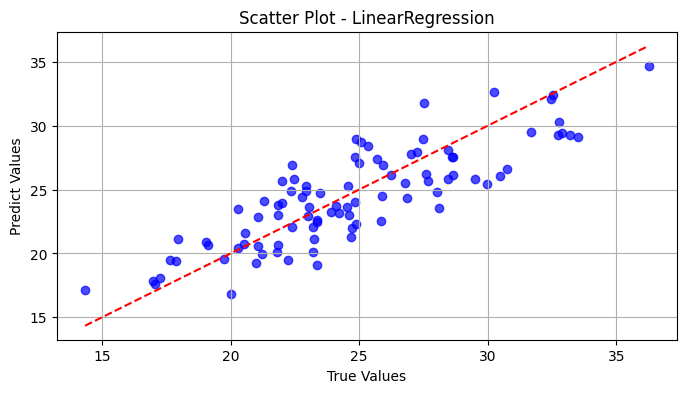

In [199]:
scatter_plot(y_test, predictions_1, lnlreg)

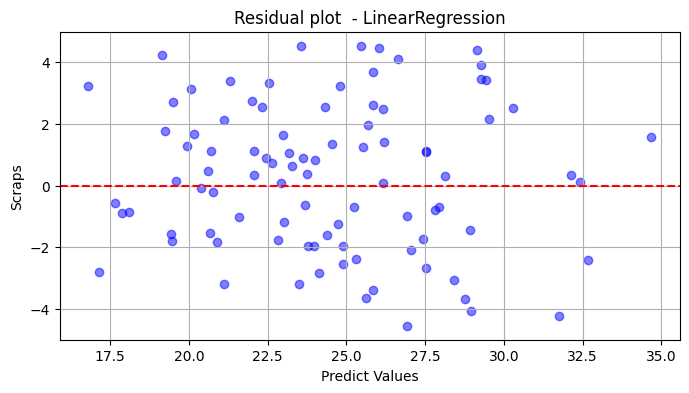

In [200]:
residual_plot(y_test,predictions_1, lnlreg)

## Lasso

In [201]:
lasso = Lasso()

lasso.fit(x_train,y_train)
predictions_2 = lasso.predict(x_test)
metrics(lasso, y_test,predictions_2)

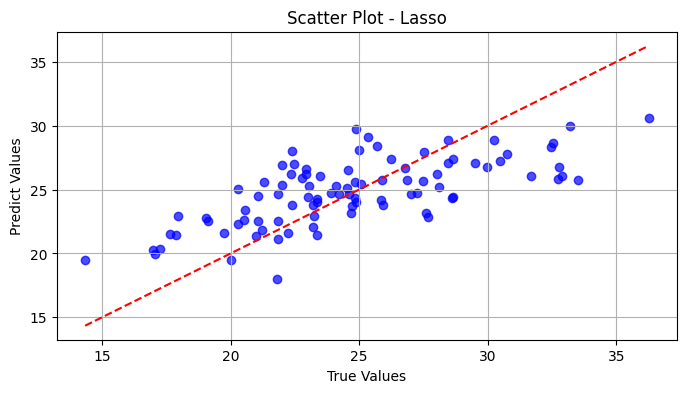

In [202]:
scatter_plot(y_test, predictions_2, lasso)

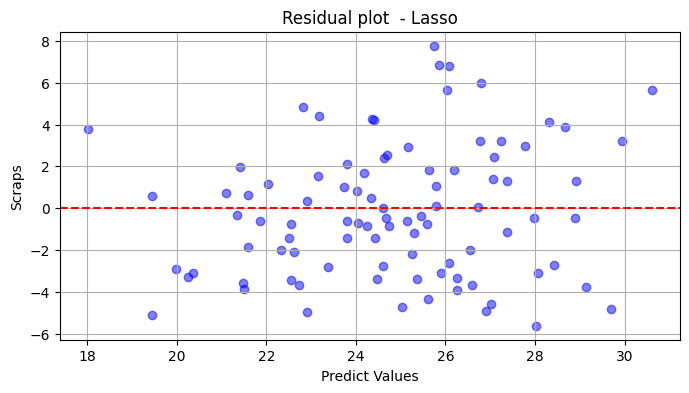

In [203]:
residual_plot(y_test,predictions_2, lasso)

## Metrics

In [204]:
pd.DataFrame(metrics_list,columns=['model','rmse','mape','r2'])

,model,rmse,mape,r2
0,LinearRegression,2.375179,0.081708,0.700741
1,Lasso,3.146019,0.107557,0.474977
